<a href="https://colab.research.google.com/github/ashley-m/VAE/blob/main/Bayes_in_the_Wild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [3]:
# !pip install pymc==4.1.4

In [4]:
# !pip uninstall -y numpy
# !pip install numpy==1.23.5

In [1]:
import pymc as pm

In [2]:
pm.__version__

'4.1.4'

In [ ]:
# Required libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

# Set the style for plots
sns.set(style='whitegrid')
np.random.seed(0)

# Part 1: Underwater Basket Weaving While Juggling
Data on performance metrics during underwater basketweaving and juggling acts.

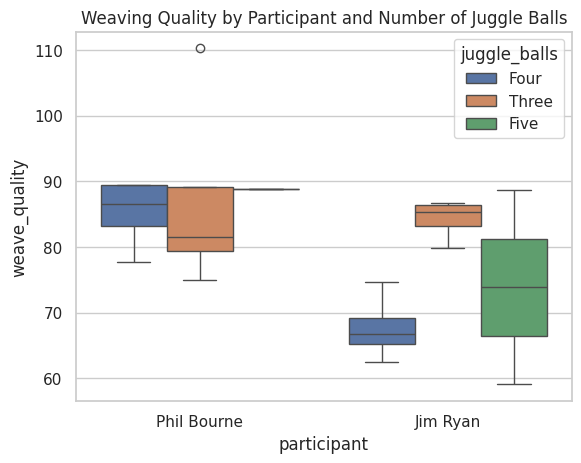

In [ ]:
weaving_data = pd.DataFrame({
    'participant': ['Phil Bourne']*10 + ['Jim Ryan']*10,
    'weave_quality': np.random.normal(80, 10, 20),
    'juggle_balls': np.random.choice(['Three', 'Four', 'Five'], 20)
})

# Visualize underwater weaving performance
sns.boxplot(x='participant', y='weave_quality', hue='juggle_balls', data=weaving_data)
plt.title('Weaving Quality by Participant and Number of Juggle Balls')
plt.show()

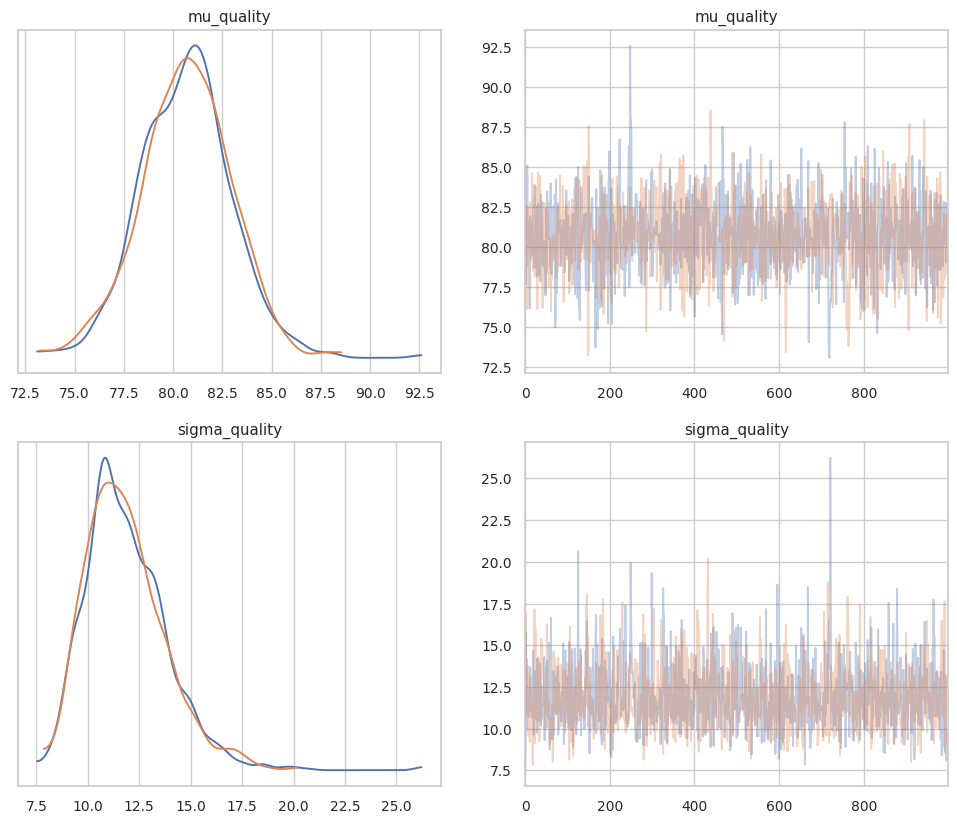

In [ ]:
with pm.Model() as weaving_model:
    # Use a Cauchy distribution for the prior of quality due to its heavy tails, suitable for accommodating outliers in performance.
    mu_quality = pm.Cauchy('mu_quality', alpha=80, beta=5)
    sigma_quality = pm.HalfCauchy('sigma_quality', beta=10)

    quality = pm.Normal('quality', mu=mu_quality, sigma=sigma_quality, observed=weaving_data['weave_quality'])

    trace_weaving = pm.sample(1000, cores=1)
    az.plot_trace(trace_weaving, compact=False)
    plt.subplots_adjust(top=2)
    plt.show()

# Part 2: Tik Tok Style Fads - Exploring the Rise of Bows and Dalgona Coffee
Data includes the popularity of different fads on social media platforms


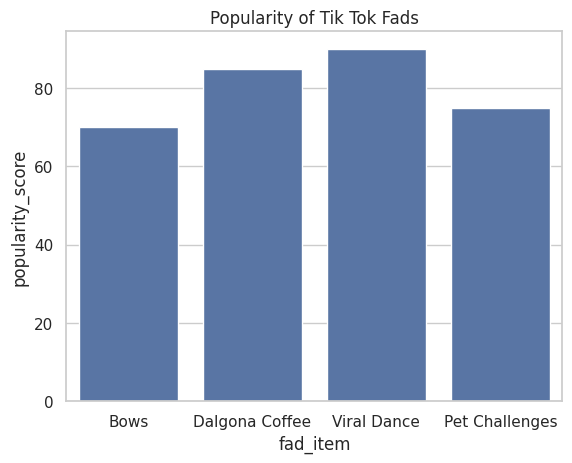

In [ ]:
fad_data = pd.DataFrame({
    'fad_item': ['Bows', 'Dalgona Coffee', 'Viral Dance', 'Pet Challenges'],
    'popularity_score': [70, 85, 90, 75]
})

sns.barplot(x='fad_item', y='popularity_score', data=fad_data)
plt.title('Popularity of Tik Tok Fads')
plt.show()

ERROR:pymc:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


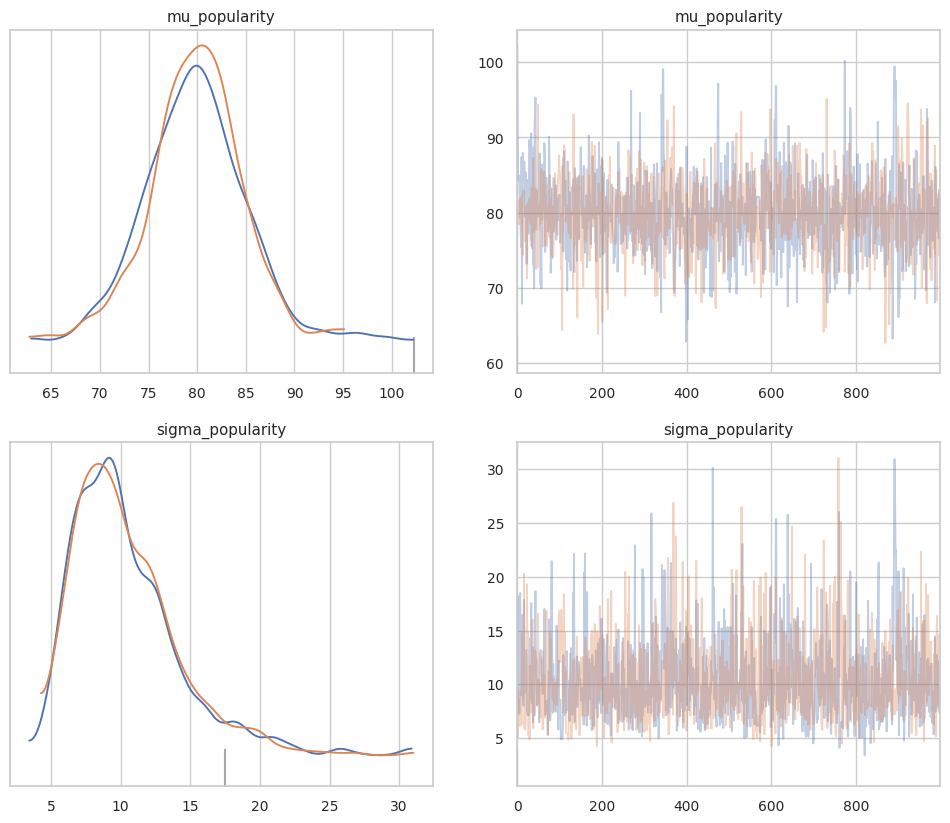

In [ ]:
with pm.Model() as fad_model:
    # Using a Normal prior for simplicity and to reflect the expected average popularity across fads.
    mu_popularity = pm.Normal('mu_popularity', mu=80, sigma=20)
    sigma_popularity = pm.HalfNormal('sigma_popularity', sigma=10)

    popularity = pm.Normal('popularity', mu=mu_popularity, sigma=sigma_popularity, observed=fad_data['popularity_score'])

    trace_fad = pm.sample(1000, cores=1)
    az.plot_trace(trace_fad, compact=False)
    plt.subplots_adjust(top=2)
    plt.show()

# Part 3: Gerrymandering in Starland - Two Star-Shaped Districts
Creating voting rates in an imaginative way without using geographical packages


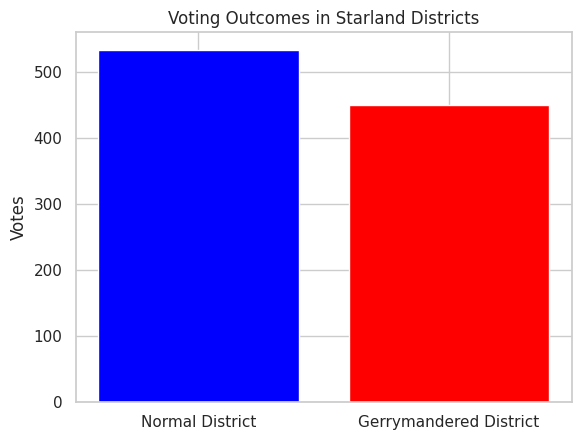

In [ ]:
voting_rates = {'Normal District': 0.55, 'Gerrymandered District': 0.45}
district_types = ['Normal District', 'Gerrymandered District']

# Simulating voting data
votes = {'Normal District': np.random.binomial(n=1000, p=voting_rates['Normal District'], size=1),
         'Gerrymandered District': np.random.binomial(n=1000, p=voting_rates['Gerrymandered District'], size=1)}

# Visualize voting results
plt.bar(district_types, [votes[d][0] for d in district_types], color=['blue', 'red'])
plt.ylabel('Votes')
plt.title('Voting Outcomes in Starland Districts')
plt.show()

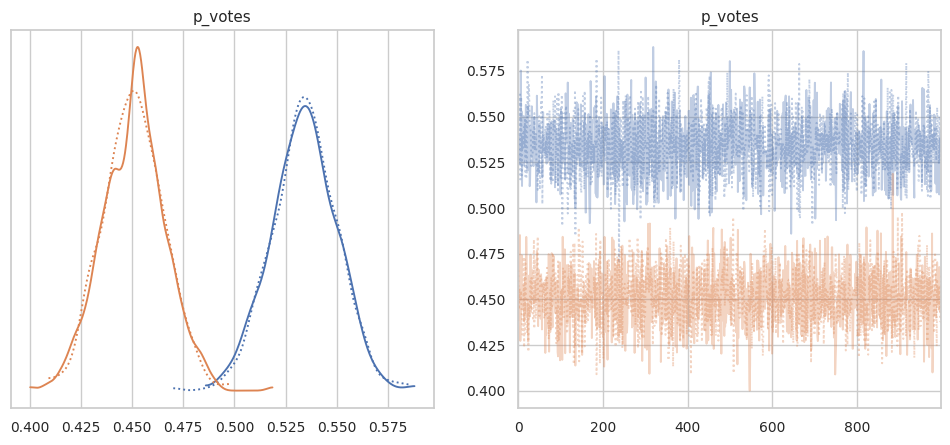

In [ ]:
with pm.Model() as gerrymandering_model:
    # Using a Beta prior for voting rates because it's naturally bounded between 0 and 1, fitting for probabilities.
    p_votes = pm.Beta('p_votes', alpha=2, beta=2, shape=2)

    # Observing votes, using Binomial likelihood because we're counting successes in trials.
    observed_votes = pm.Binomial('observed_votes', n=1000, p=p_votes, observed=[votes[d][0] for d in district_types])

    trace_gerrymandering = pm.sample(1000, cores=1)
    az.plot_trace(trace_gerrymandering, compact=True)
    plt.subplots_adjust(top=2)
    plt.show()

# Part 4: Baseball Data Analysis - Player Batting Averages
Data for player batting averages during a season


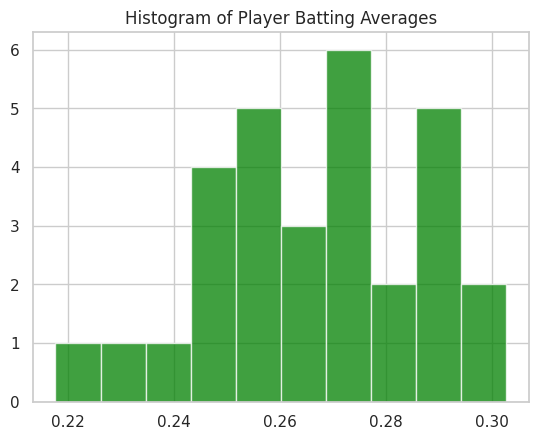

In [ ]:
player_averages = np.random.beta(a=81, b=219, size=30)  # Simulating batting averages

# Visualize batting averages
plt.hist(player_averages, bins=10, color='green', alpha=0.75)
plt.title('Histogram of Player Batting Averages')
plt.show()

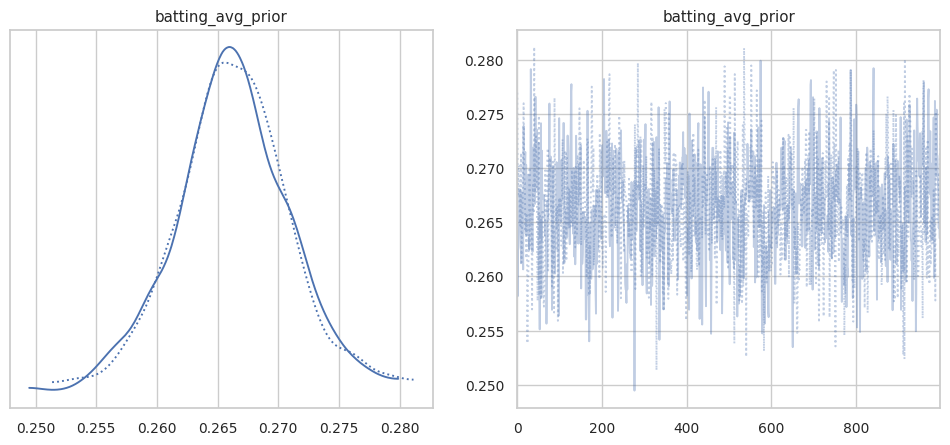

In [ ]:
with pm.Model() as baseball_model:
    # Using a Beta prior because batting averages are proportions that naturally fit within [0,1].
    batting_avg_prior = pm.Beta('batting_avg_prior', alpha=81, beta=219)

    # Likelihood of observing the batting averages
    observed_averages = pm.Beta('observed_averages', alpha=batting_avg_prior * 300, beta=(1-batting_avg_prior) * 300, observed=player_averages)

    trace_baseball = pm.sample(1000, cores=1)
    az.plot_trace(trace_baseball, compact=True)
    plt.subplots_adjust(top=2)
    plt.show()

# Part 5: Willy Wonka's Chocolate Bar Sales Analysis
Examining the impact of golden tickets on chocolate bar sales


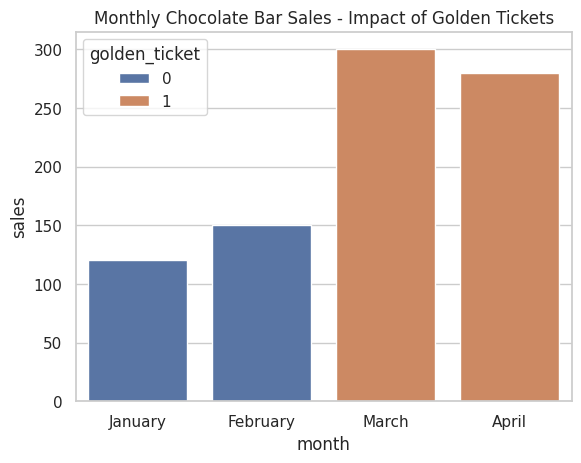

In [ ]:
sales_data = pd.DataFrame({
    'month': ['January', 'February', 'March', 'April'],
    'sales': [120, 150, 300, 280],  # Sales spike with golden ticket announcement
    'golden_ticket': [0, 0, 1, 1]  # Months with golden ticket promotion
})

sns.barplot(x='month', y='sales', hue='golden_ticket', data=sales_data)
plt.title('Monthly Chocolate Bar Sales - Impact of Golden Tickets')
plt.show()

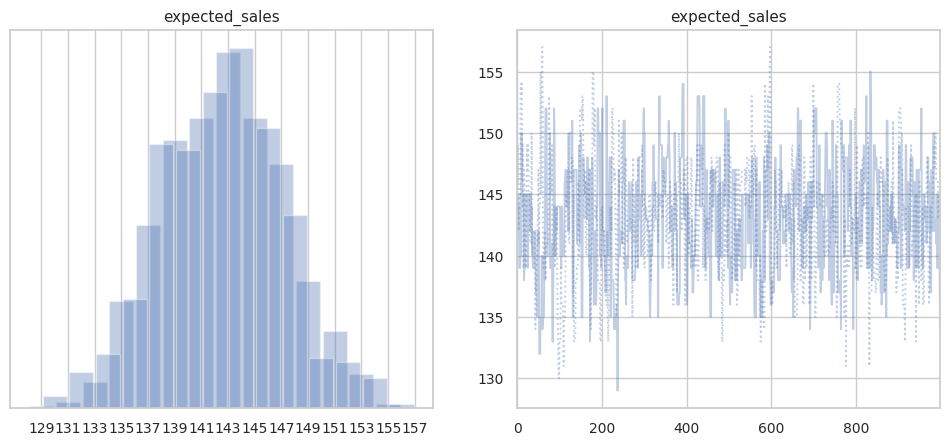

In [ ]:
with pm.Model() as wonka_model:
    # Using a Poisson prior because sales counts are non-negative integers, appropriate for count data.
    expected_sales = pm.Poisson('expected_sales', mu=150)

    # Likelihood of sales given months with/without golden tickets
    sales_obs = pm.Poisson('sales_obs', mu=expected_sales * (1 + sales_data['golden_ticket']), observed=sales_data['sales'])

    trace_wonka = pm.sample(1000, cores=1)
    az.plot_trace(trace_wonka, compact=True)
    plt.subplots_adjust(top=2)
    plt.show()